# Part II - (Presentation  of Findings)
## by (Bright Ofori Boye Eshun)



## Investigation Overview
> This project seeks to investigate:
>- if the user_type, age, member_gender affects the duration of the trip.
>- which of the user type was majority and grouped under gender which of them took longer rides. 


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The individuals have been group by gender(male, female and other) and by the type of users they are, whether subcribers or customers. They birth year of the individuals were also given, hence we can go to calculate for their ages since the year at the time was 2019. The data contains 183412 rows and 16 columns

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('wrangled_data.csv')

In [17]:
base_color = sb.color_palette()[0]

## Distribution of Durations
> Most trips were within the range of 250 secs and 2000 secs range. We can also realise, around 250 secs the number of trips began to increase from 8000 to 12000 where it peaked at 600 secs, then began to decline as duration approaches  2000 secs. This means anyone who took a trip definely rode more than 250 secs.


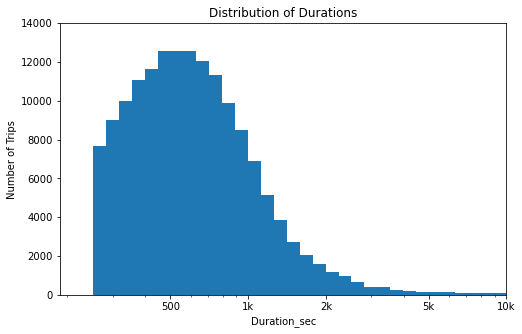

In [18]:
# to make the graph more clearer lets use a log graph
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 14000])
plt.show();

## Duration vs Age

> Most frequent users who took longer trips were concerntrated between the ages of 25 and 35 years. Generally majority of the users between the ages of 20 and 60 years were able to ride for 1000 secs.

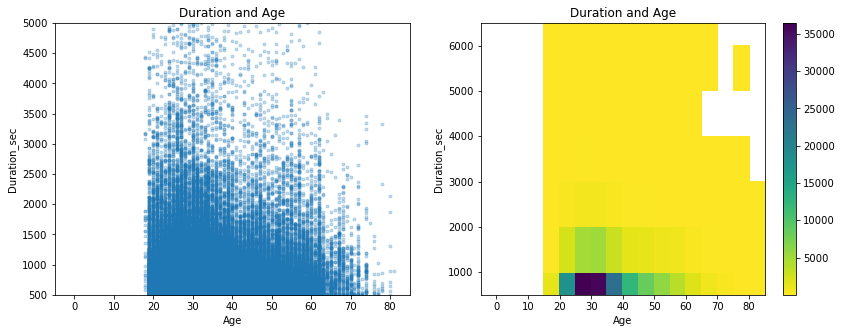

In [19]:

bins_y = np.arange(0, 85444+1000, 1000)
bins_x = np.arange(0, 141+5, 5)

plt.figure(figsize=[14,5])
# plot 1: A scatter plot to check the relation between age and duration
plt.subplot(1, 2, 1)
plt.scatter(data=df.dropna(), x='age', y='duration_sec', alpha = 0.25, marker = '.' )
plt.title('Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec');
plt.axis([-5, 85, 500, 5000])


# plot 1: A heapmap to check the relation between age and duration
plt.subplot(1, 2, 2)
plt.hist2d(data=df.dropna(), x='age', y='duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec');
plt.axis([-5, 85, 500, 6500]);

## Duration vs Gender
> All three genders male, female and other have almost the same median duration, but averagely both female and other took longer trips than male. All three have huge numbers of outliers with males having the most


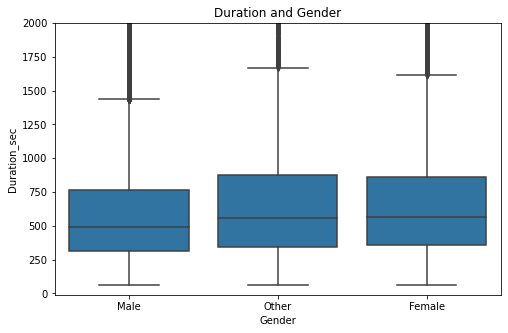

In [20]:
plt.figure(figsize=(8, 5))
# since the ealier boxplot is not clear enough let's trim the ylimit to make it clearer
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.title('Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec');
plt.ylim(-10, 2000);

## Duration vs User Type 
> Users who were customers took longer rides than subcribers and also had a higher median duration than subcribers.

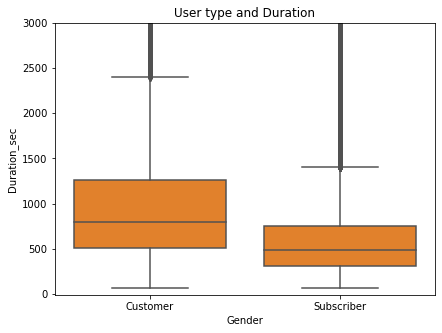

In [21]:
# since the ealier boxplot is not clear enough let's trim the y limit to make it clearer
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='user_type', y='duration_sec', color=sb.color_palette()[1])
plt.title('User type and Duration')
plt.xlabel('Gender')
plt.ylabel('Duration_sec');
plt.ylim(-10, 3000);


## User type and Gender
> Majority of the users were subscriber and the male gender was the majority in both type of users

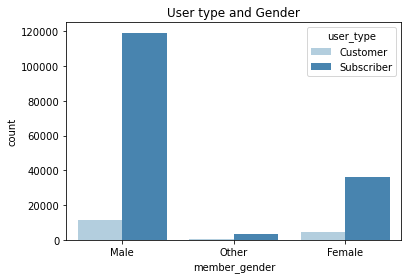

In [22]:
sb.countplot(data=df, hue='user_type', x='member_gender', palette='Blues')
plt.title('User type and Gender');

## Duration and Gender by User type
> Although there are more males subcribers and male customers than the other genders. We can also notice female customers took longer rides than other gender of customers but amongst the subcribers other took longer rides than the rest.

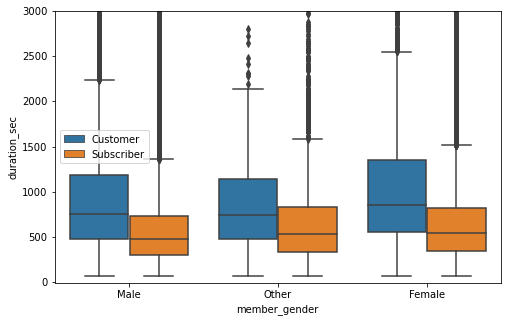

In [23]:
plt.figure(figsize=(8, 5))
sb.boxplot(data=df.dropna(), y='duration_sec', x='member_gender', hue='user_type');
plt.ylim(-10, 3000);
plt.legend();

In [24]:
# create function to plot facet grids
def plot_facet_grid(data, x, y, z, title, xlabel, ylabel):
    facet = sb.FacetGrid(data = data, col = z, col_wrap = 2, height = 5,
                     xlim = [10, 80], ylim = [-500, 9000])
    facet.map(plt.scatter, x, y, alpha= 1)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.fig.suptitle(title)
    plt.show()

## Duration and Age by Gender
> The distribution is somehow the same for male and female but in other, the duration also decreases as age increase but when it got to the ages around 55 years it slightly jumps again. We can realise the duration for old age in other is averagely higher.

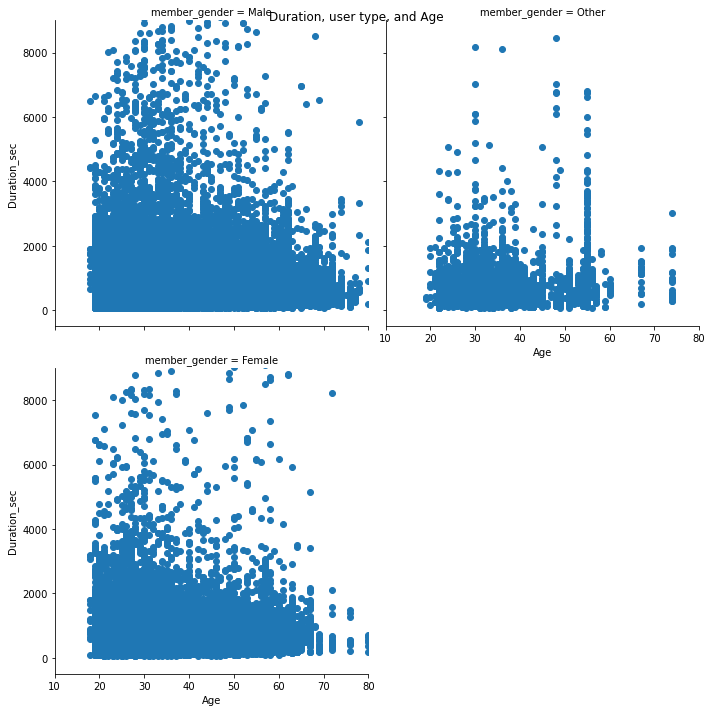

In [25]:
facet_member_gender = plot_facet_grid(df.dropna(), 'age', 'duration_sec', 'member_gender', 
                                  'Duration, user type, and Age', 'Age', 'Duration_sec')
facet_member_gender

## Duration and Age by User type
> The trend for the distribution between the two graphs are the same. We realised that there more subscribers between ages of 50 and 60 who took longer trips than the same age in customers.

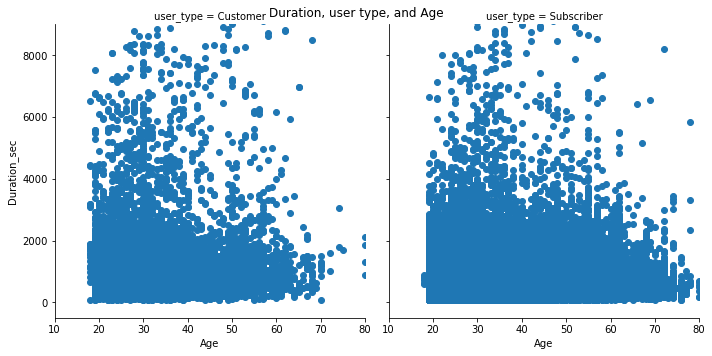

In [26]:
facet_user_type = plot_facet_grid(df.dropna(), 'age', 'duration_sec', 'user_type', 
                                  'Duration, user type, and Age', 'Age', 'Duration_sec')
facet_user_type

In [27]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.
